In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000

Popularity vs rating

<Axes: xlabel='RATING', ylabel='VOTES'>

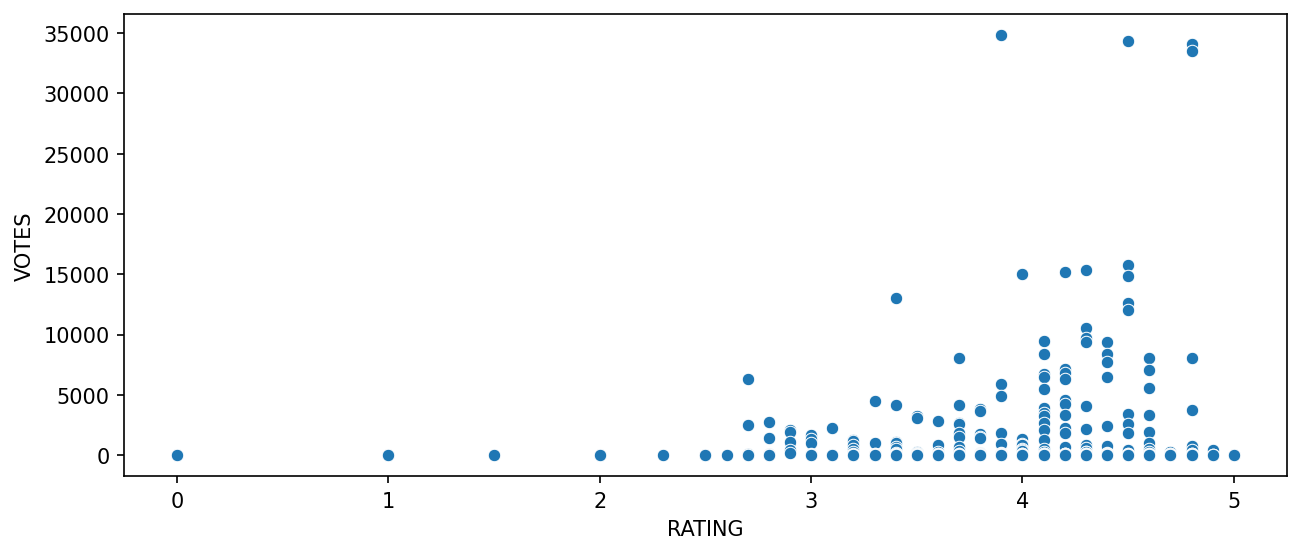

In [7]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, y='VOTES', x='RATING')

extract Year

In [8]:
title = "Film Title Name (Year)"

In [9]:
title.split('(')[-1].replace(')','')

'Year'

In [10]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [11]:
fandango

FILM  STARS  RATING  VOTES  YEAR
0             Fifty Shades of Grey (2015)    4.0     3.9  34846  2015
1                   Jurassic World (2015)    4.5     4.5  34390  2015
2                  American Sniper (2015)    5.0     4.8  34085  2015
3                        Furious 7 (2015)    5.0     4.8  33538  2015
4                       Inside Out (2015)    4.5     4.5  15749  2015
..                                    ...    ...     ...    ...   ...
499                      Valiyavan (2015)    0.0     0.0      0  2015
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0  2015
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0  2015
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0  1964
503                         Zarafa (2012)    0.0     0.0      0  2012

[504 rows x 5 columns]

How many movies are in Fandango DataFrame per year?

In [12]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

Visualize the count of movies per year with a plot

<Axes: xlabel='YEAR', ylabel='count'>

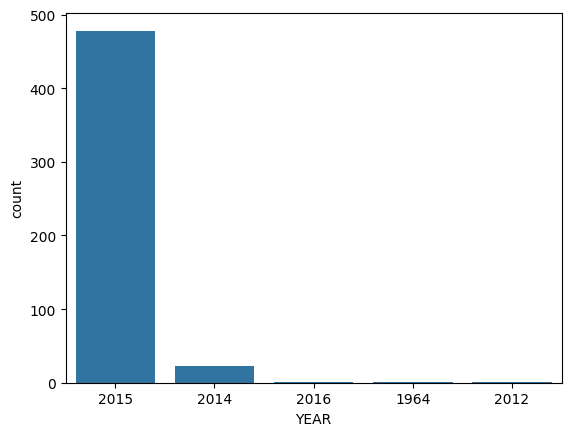

In [13]:
sns.countplot(data=fandango,x='YEAR')

What are the ten movies with the highest number of votes

In [14]:
fandango.nlargest(10,'VOTES')

FILM  STARS  RATING  VOTES  \
0                       Fifty Shades of Grey (2015)    4.0     3.9  34846   
1                             Jurassic World (2015)    4.5     4.5  34390   
2                            American Sniper (2015)    5.0     4.8  34085   
3                                  Furious 7 (2015)    5.0     4.8  33538   
4                                 Inside Out (2015)    4.5     4.5  15749   
5  The Hobbit: The Battle of the Five Armies (2014)    4.5     4.3  15337   
6               Kingsman: The Secret Service (2015)    4.5     4.2  15205   
7                                    Minions (2015)    4.0     4.0  14998   
8                    Avengers: Age of Ultron (2015)    5.0     4.5  14846   
9                             Into the Woods (2014)    3.5     3.4  13055   

   YEAR  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015  
5  2014  
6  2015  
7  2015  
8  2015  
9  2014

How many movies have zero votes?

In [15]:
no_votes = fandango['VOTES']==0

In [16]:
no_votes.sum()

69

DataFrame of only reviewed films

In [17]:
fan_reviewed = fandango[fandango['VOTES']>0]

KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING)

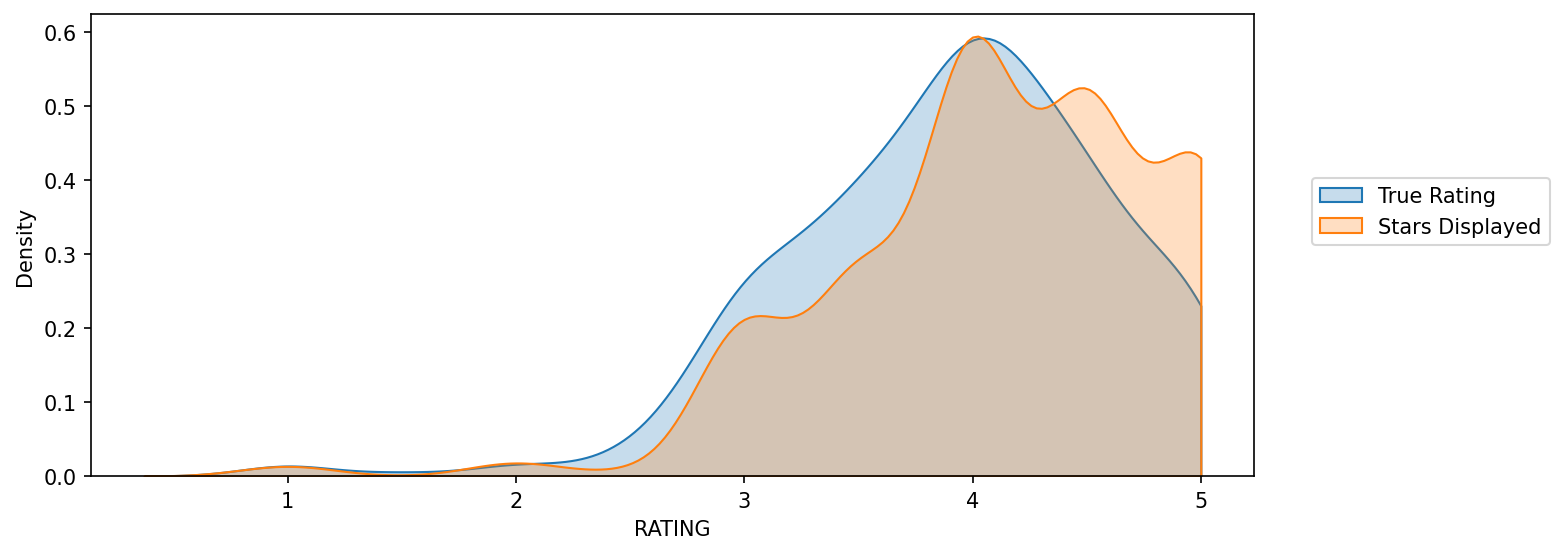

In [18]:
plt.figure(figsize=(10,4),dpi=150)

sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')
plt.legend(loc=(1.05,0.5))

Difference between STAR and true RATING

In [19]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']

C:\Users\atsel\AppData\Local\Temp\ipykernel_23872\1435696898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']


In [20]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\atsel\AppData\Local\Temp\ipykernel_23872\1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [21]:
fan_reviewed

FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
0    Fifty Shades of Grey (2015)    4.0     3.9  34846  2015         0.1
1          Jurassic World (2015)    4.5     4.5  34390  2015         0.0
2         American Sniper (2015)    5.0     4.8  34085  2015         0.2
3               Furious 7 (2015)    5.0     4.8  33538  2015         0.2
4              Inside Out (2015)    4.5     4.5  15749  2015         0.0
..                           ...    ...     ...    ...   ...         ...
430       That Sugar Film (2015)    5.0     5.0      1  2015         0.0
431            The Intern (2015)    5.0     5.0      1  2015         0.0
432        The Park Bench (2015)    5.0     5.0      1  2015         0.0
433         The Wanted 18 (2015)    5.0     5.0      1  2015         0.0
434       Z For Zachariah (2015)    5.0     5.0      1  2015         0.0

[435 rows x 6 columns]

count plot

C:\Users\atsel\AppData\Local\Temp\ipykernel_23872\2171621523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

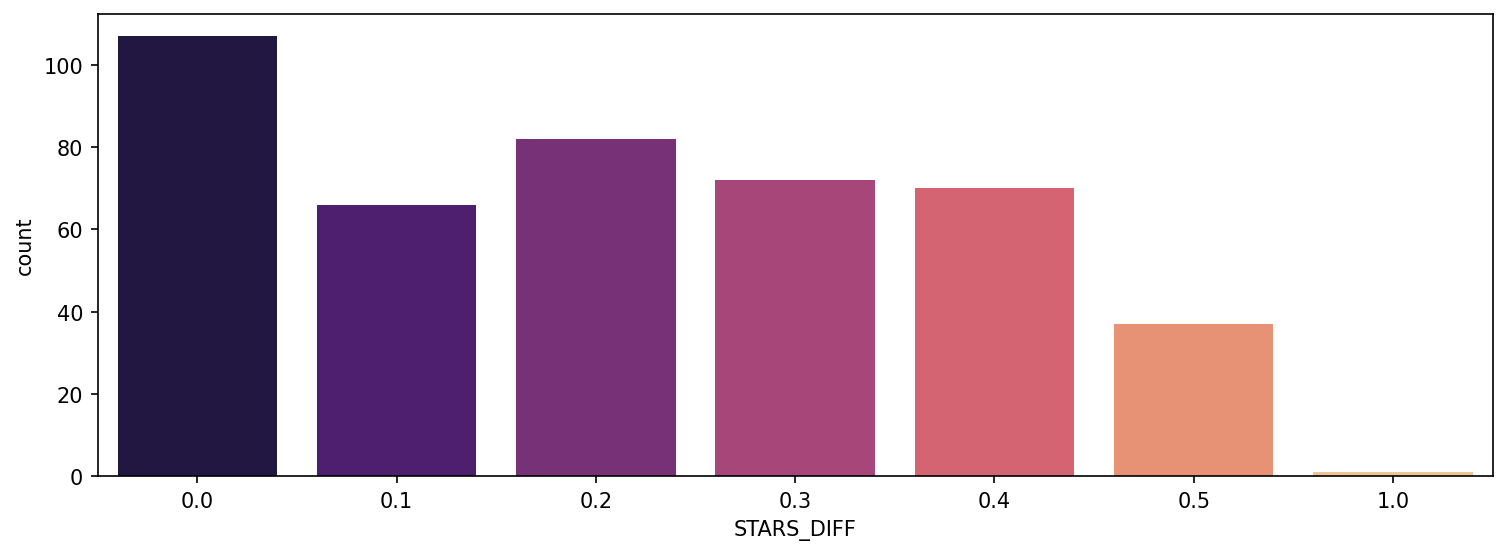

In [22]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

Check which movie had the 1 star differential as noted form the plot above

In [23]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
381  Turbo Kid (2015)    5.0     4.0      2  2015         1.0

Compare fandago rating to other sites

In [24]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [25]:
all_sites.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4                 19560

In [26]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [27]:
all_sites.describe()

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  
count  146.000000                  146.000000            146.000000  
mean     6.736986                  185.705479          42846.205479  
std      0.958736                  316.606515          67406.509171  
min      4.000000                    4.000000            243.000000  
25%      6.300000                   33.250000           5627.000000  
50%      6.900000                   72.500000          19103.000000  
75%      7.400000                  168.500000          45185.750000  
max      8.600000                 2375.000000         334164.000000

Rotten Tomatoes:
two review types: Critics and User reviews

(0.0, 100.0)

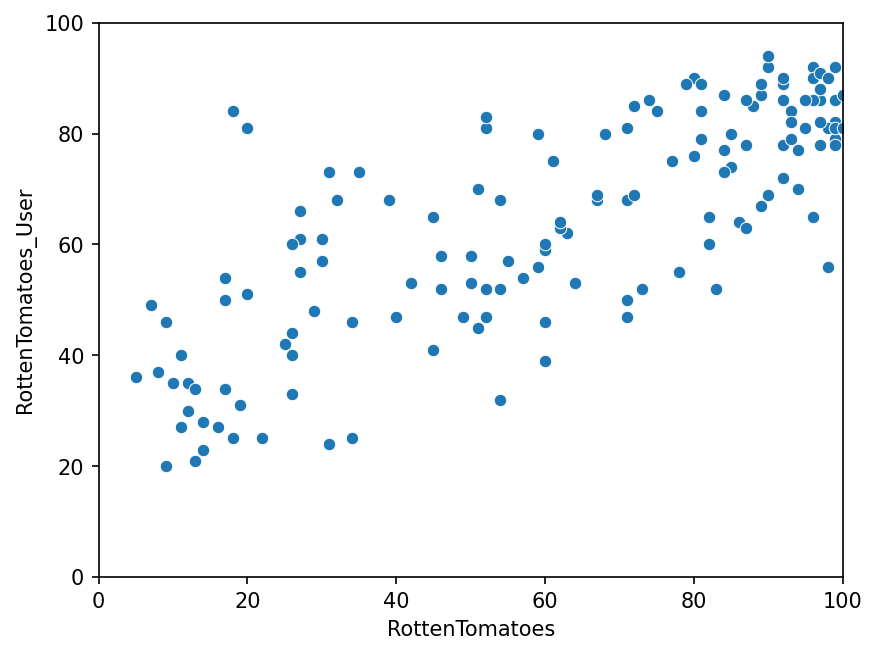

In [31]:
plt.figure(dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

Quantifying the critics rating and user rating: Critics rating minus user rating. Large positive value means critics liked it more and vice versa.

In [32]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

mean absolute difference: Since there could be negative and positive numbers  you need to get the absolute value first before getting the mean. Absolute difference in ratings.

In [33]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

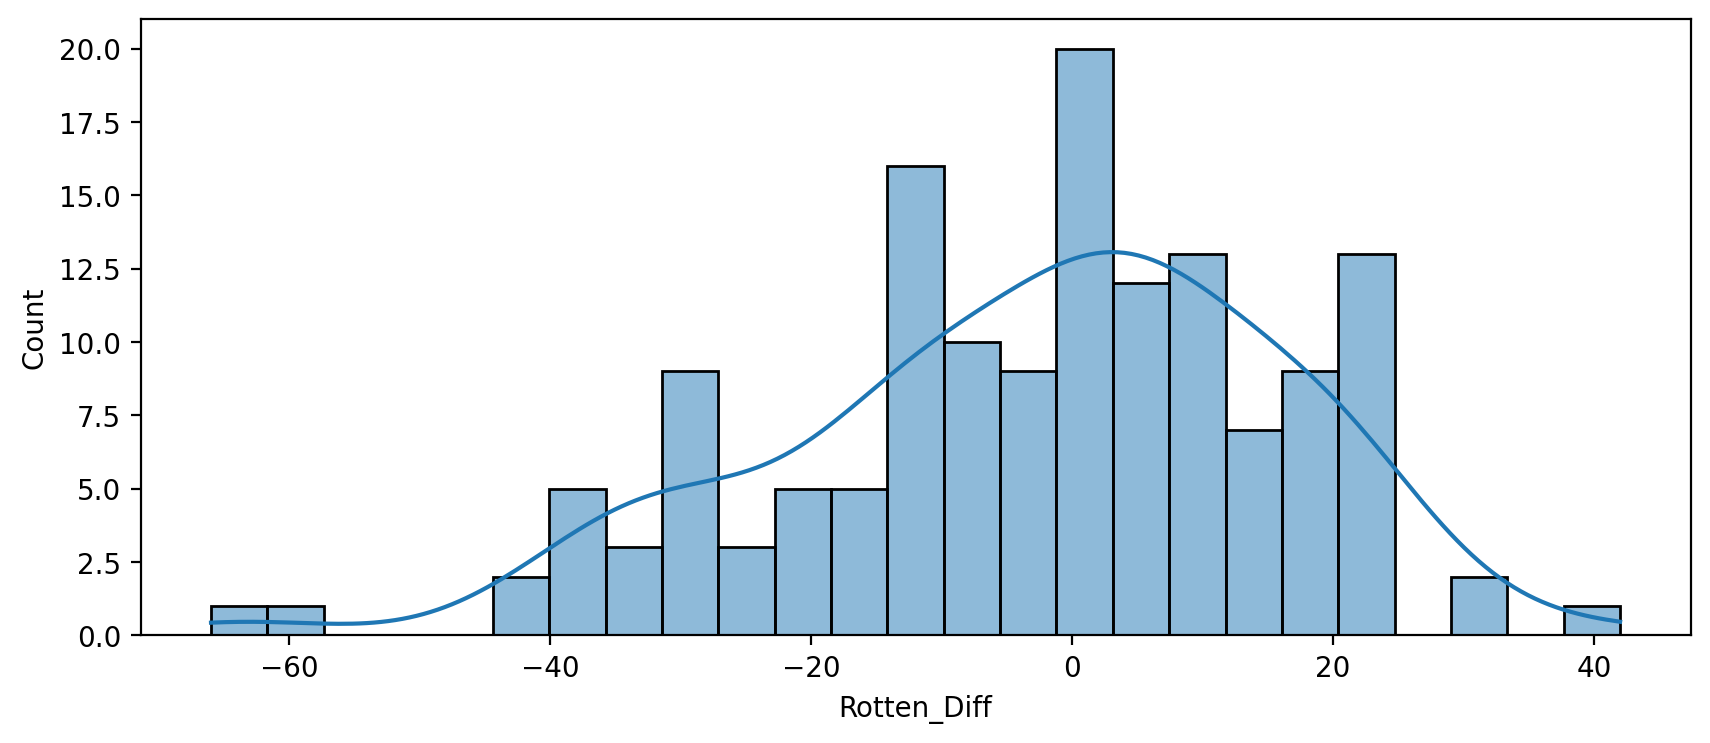

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True,bins=25)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

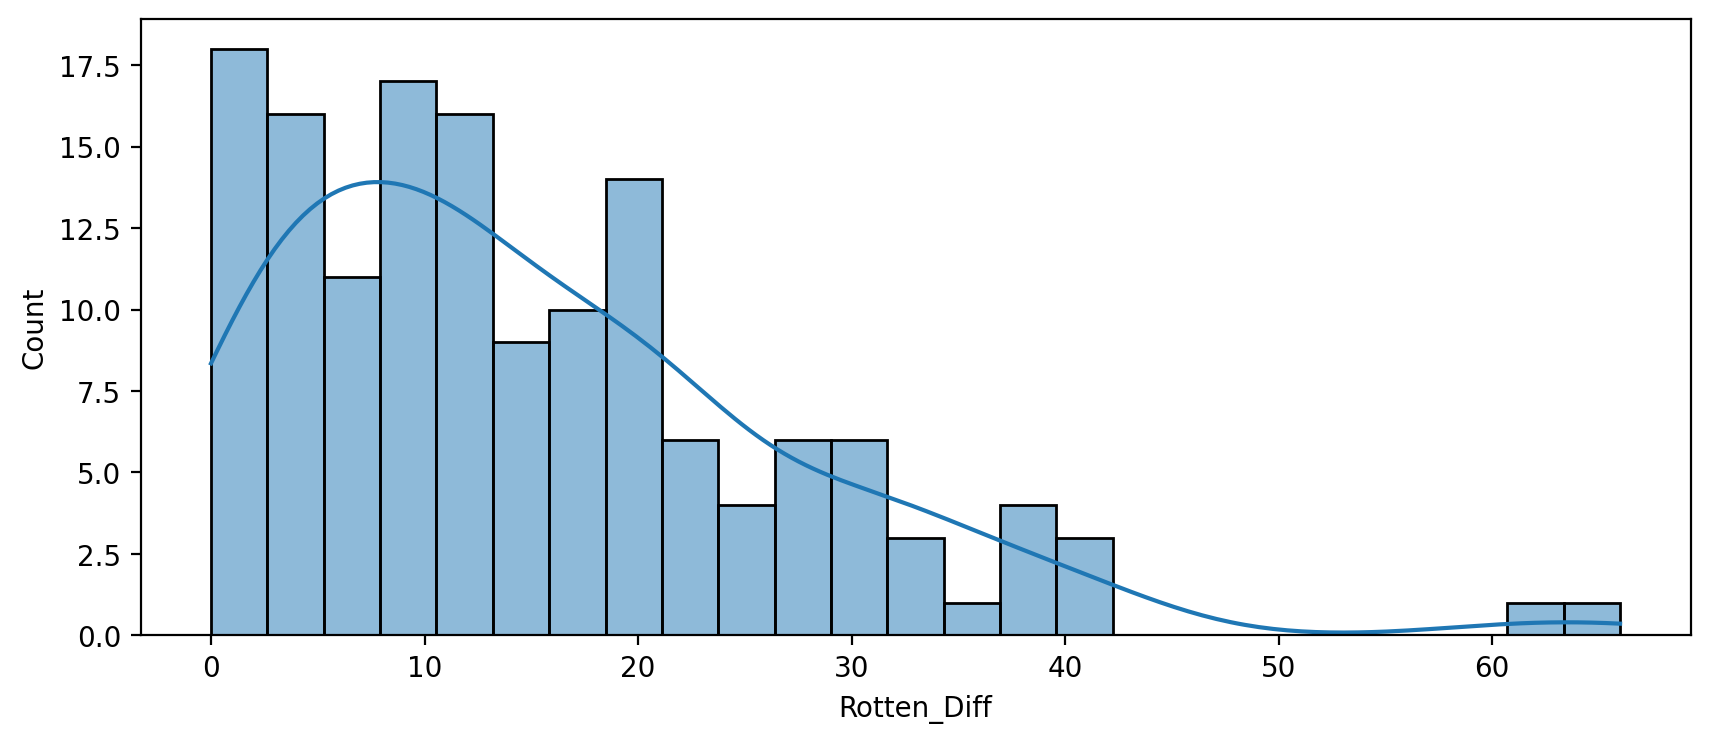

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), kde=True,bins=25)

Find movies causing largest differences. What are the top 5 movies users rated higher than critics on average?

In [44]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

Top 5 movies critics scored higher than users.

In [45]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

METACRITIC

Scatterplot of metacritic ratings versus metacritic user rating

(0.0, 100.0)

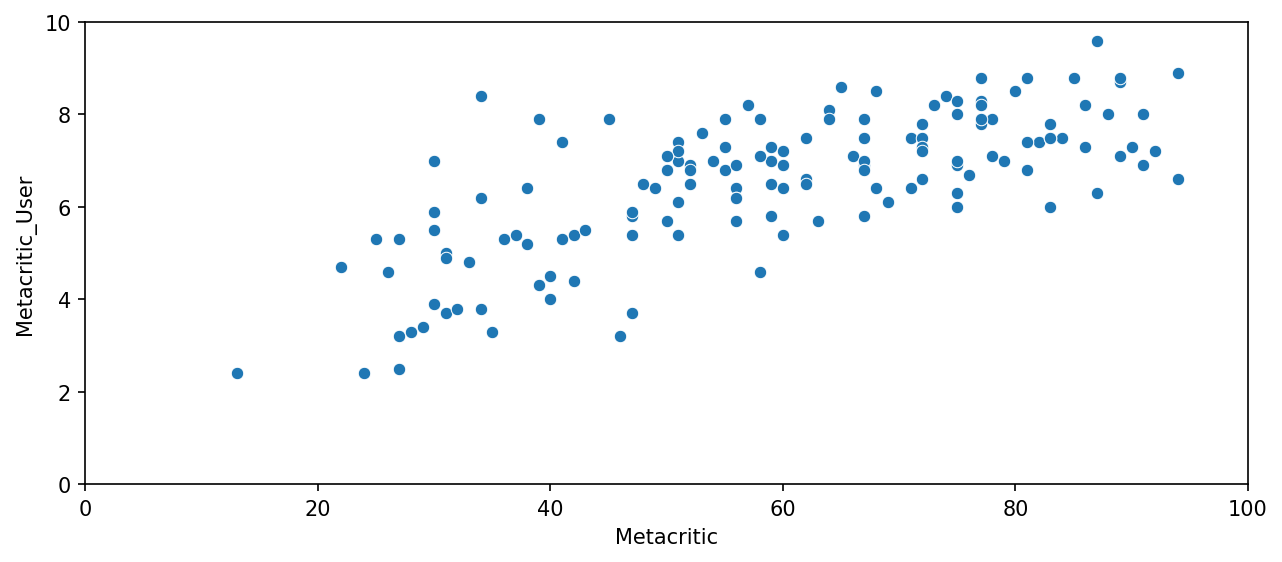

In [48]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

IMDB

Scatterplot of MetaCritic versus votes counts on IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

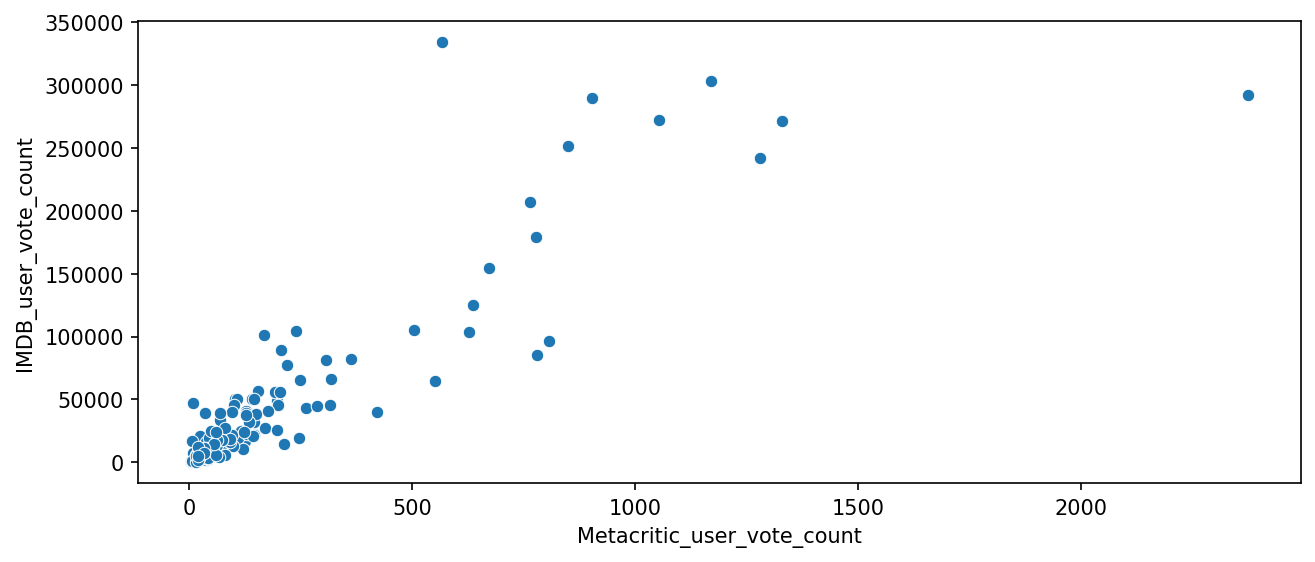

In [50]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

What is the highest vote count movie on IMDB?

In [51]:
all_sites.nlargest(1,'IMDB_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
14  The Imitation Game (2014)              90                   92   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
14          73              8.2   8.1                         566   

    IMDB_user_vote_count  Rotten_Diff  
14                334164           -2

What is the highest vote count movie on MetaCritic?

In [52]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

FILM  RottenTomatoes  RottenTomatoes_User  \
88  Mad Max: Fury Road (2015)              97                   88   

    Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
88          89              8.7   8.3                        2375   

    IMDB_user_vote_count  Rotten_Diff  
88                292023            9

Fandango vs all_sites - is Fandango showing artifically boosted ratings?

Combine fandango with all sites tables

In [54]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [55]:
df

FILM  STARS  RATING  VOTES  YEAR  \
0           Fifty Shades of Grey (2015)    4.0     3.9  34846  2015   
1                 Jurassic World (2015)    4.5     4.5  34390  2015   
2                American Sniper (2015)    5.0     4.8  34085  2015   
3                      Furious 7 (2015)    5.0     4.8  33538  2015   
4                     Inside Out (2015)    4.5     4.5  15749  2015   
..                                  ...    ...     ...    ...   ...   
140  Kumiko, The Treasure Hunter (2015)    3.5     3.5     41  2015   
141  The Diary of a Teenage Girl (2015)    4.0     3.6     38  2015   
142            The Wrecking Crew (2015)    4.5     4.2     38  2015   
143                    Tangerine (2015)    4.0     3.9     36  2015   
144            Maps to the Stars (2015)    3.5     3.1     35  2015   

     RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                25                   42          46              3.2   4.2   
1                71                   81          59              7.0   7.3   
2                72                   85          72              6.6   7.4   
3                81                   84          67              6.8   7.4   
4                98                   90          94              8.9   8.6   
..              ...                  ...         ...              ...   ...   
140              87                   63          68              6.4   6.7   
141              95                   81          87              6.3   7.0   
142              93                   84          67              7.0   7.8   
143              95                   86          86              7.3   7.4   
144              60                   46          67              5.8   6.3   

     Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  
0                           778                179506          -17  
1                          1281                241807          -10  
2                           850                251856          -13  
3                           764                207211           -3  
4                           807                 96252            8  
..                          ...                   ...          ...  
140                          19                  5289           24  
141                          18                  1107           14  
142                           4                   732            9  
143                          14                   696            9  
144                          46                 22440           14  

[145 rows x 13 columns]

Now we normalize the stars and rating between 0-5 so that we can compare them equally. (simply way)

In [58]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [59]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [63]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [64]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [65]:
df.head()

FILM  STARS  RATING  VOTES  YEAR  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846  2015              25   
1        Jurassic World (2015)    4.5     4.5  34390  2015              71   
2       American Sniper (2015)    5.0     4.8  34085  2015              72   
3             Furious 7 (2015)    5.0     4.8  33538  2015              81   
4            Inside Out (2015)    4.5     4.5  15749  2015              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  RT_Norm  \
0                         778                179506          -17      1.2   
1                        1281                241807          -10      3.6   
2                         850                251856          -13      3.6   
3                         764                207211           -3      4.0   
4                         807                 96252            8      4.9   

   RTU_Norm  IMDB_Norm  Meta_Norm  Meta_U_Norm  
0       2.1        2.1        2.3          1.6  
1       4.0        3.6        3.0          3.5  
2       4.2        3.7        3.6          3.3  
3       4.2        3.7        3.4          3.4  
4       4.5        4.3        4.7          4.4

Norm scores dataframe that only takes norm distribution

In [66]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'IMDB_Norm', 'Meta_Norm', 'Meta_U_Norm'],
      dtype='object')

In [67]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'IMDB_Norm', 'Meta_Norm', 'Meta_U_Norm']]

In [68]:
norm_scores.head()

STARS  RATING  RT_Norm  RTU_Norm  IMDB_Norm  Meta_Norm  Meta_U_Norm
0    4.0     3.9      1.2       2.1        2.1        2.3          1.6
1    4.5     4.5      3.6       4.0        3.6        3.0          3.5
2    5.0     4.8      3.6       4.2        3.7        3.6          3.3
3    5.0     4.8      4.0       4.2        3.7        3.4          3.4
4    4.5     4.5      4.9       4.5        4.3        4.7          4.4

moment of truth!

Function to fix the legend placement

<Axes: ylabel='Density'>

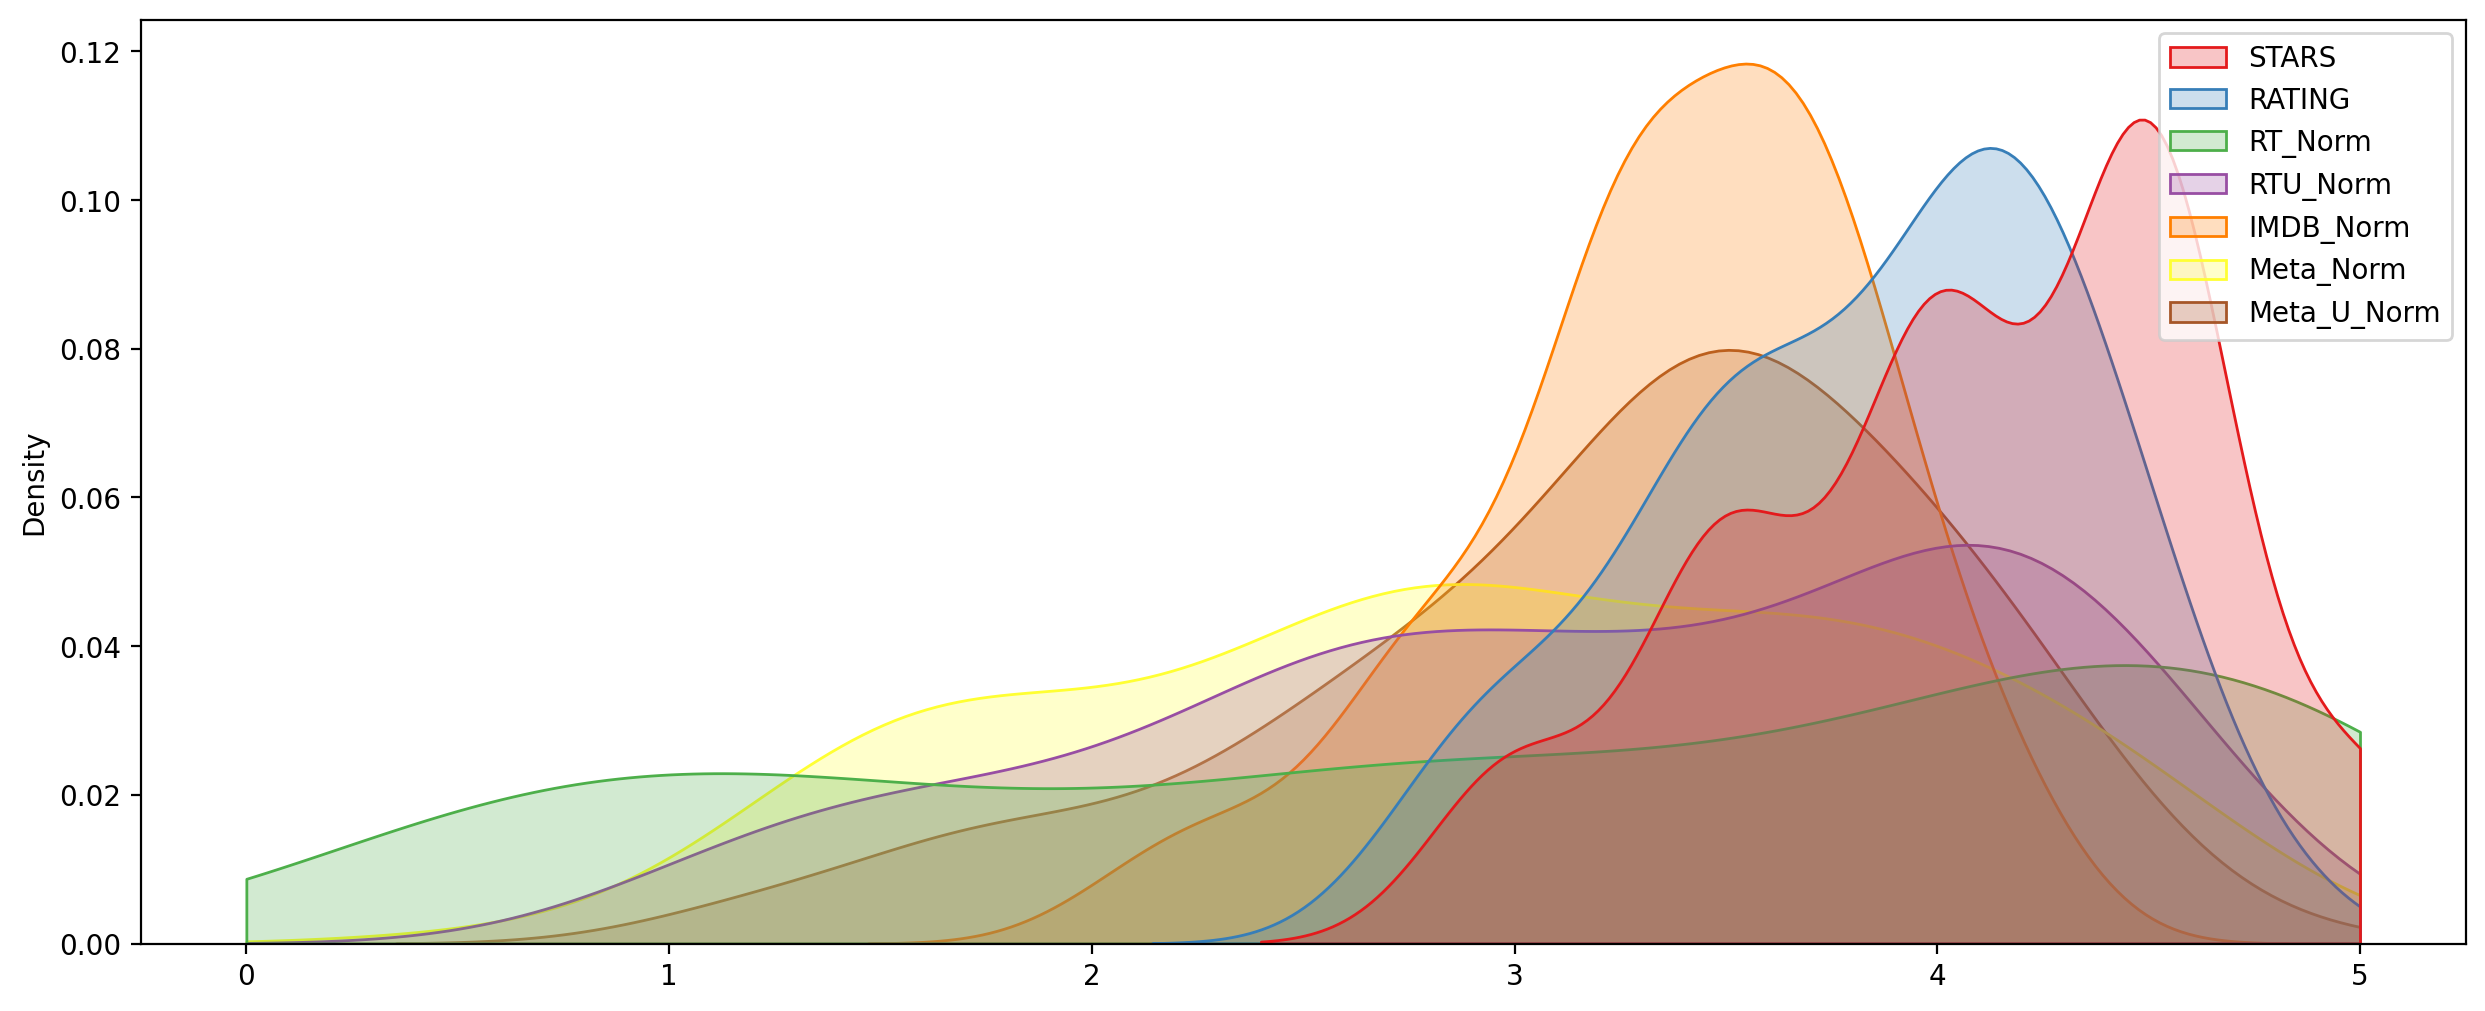

In [79]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1')

Graph shows that the Stars and Rating are much higher than the rest of the ratings.

<Axes: ylabel='Density'>

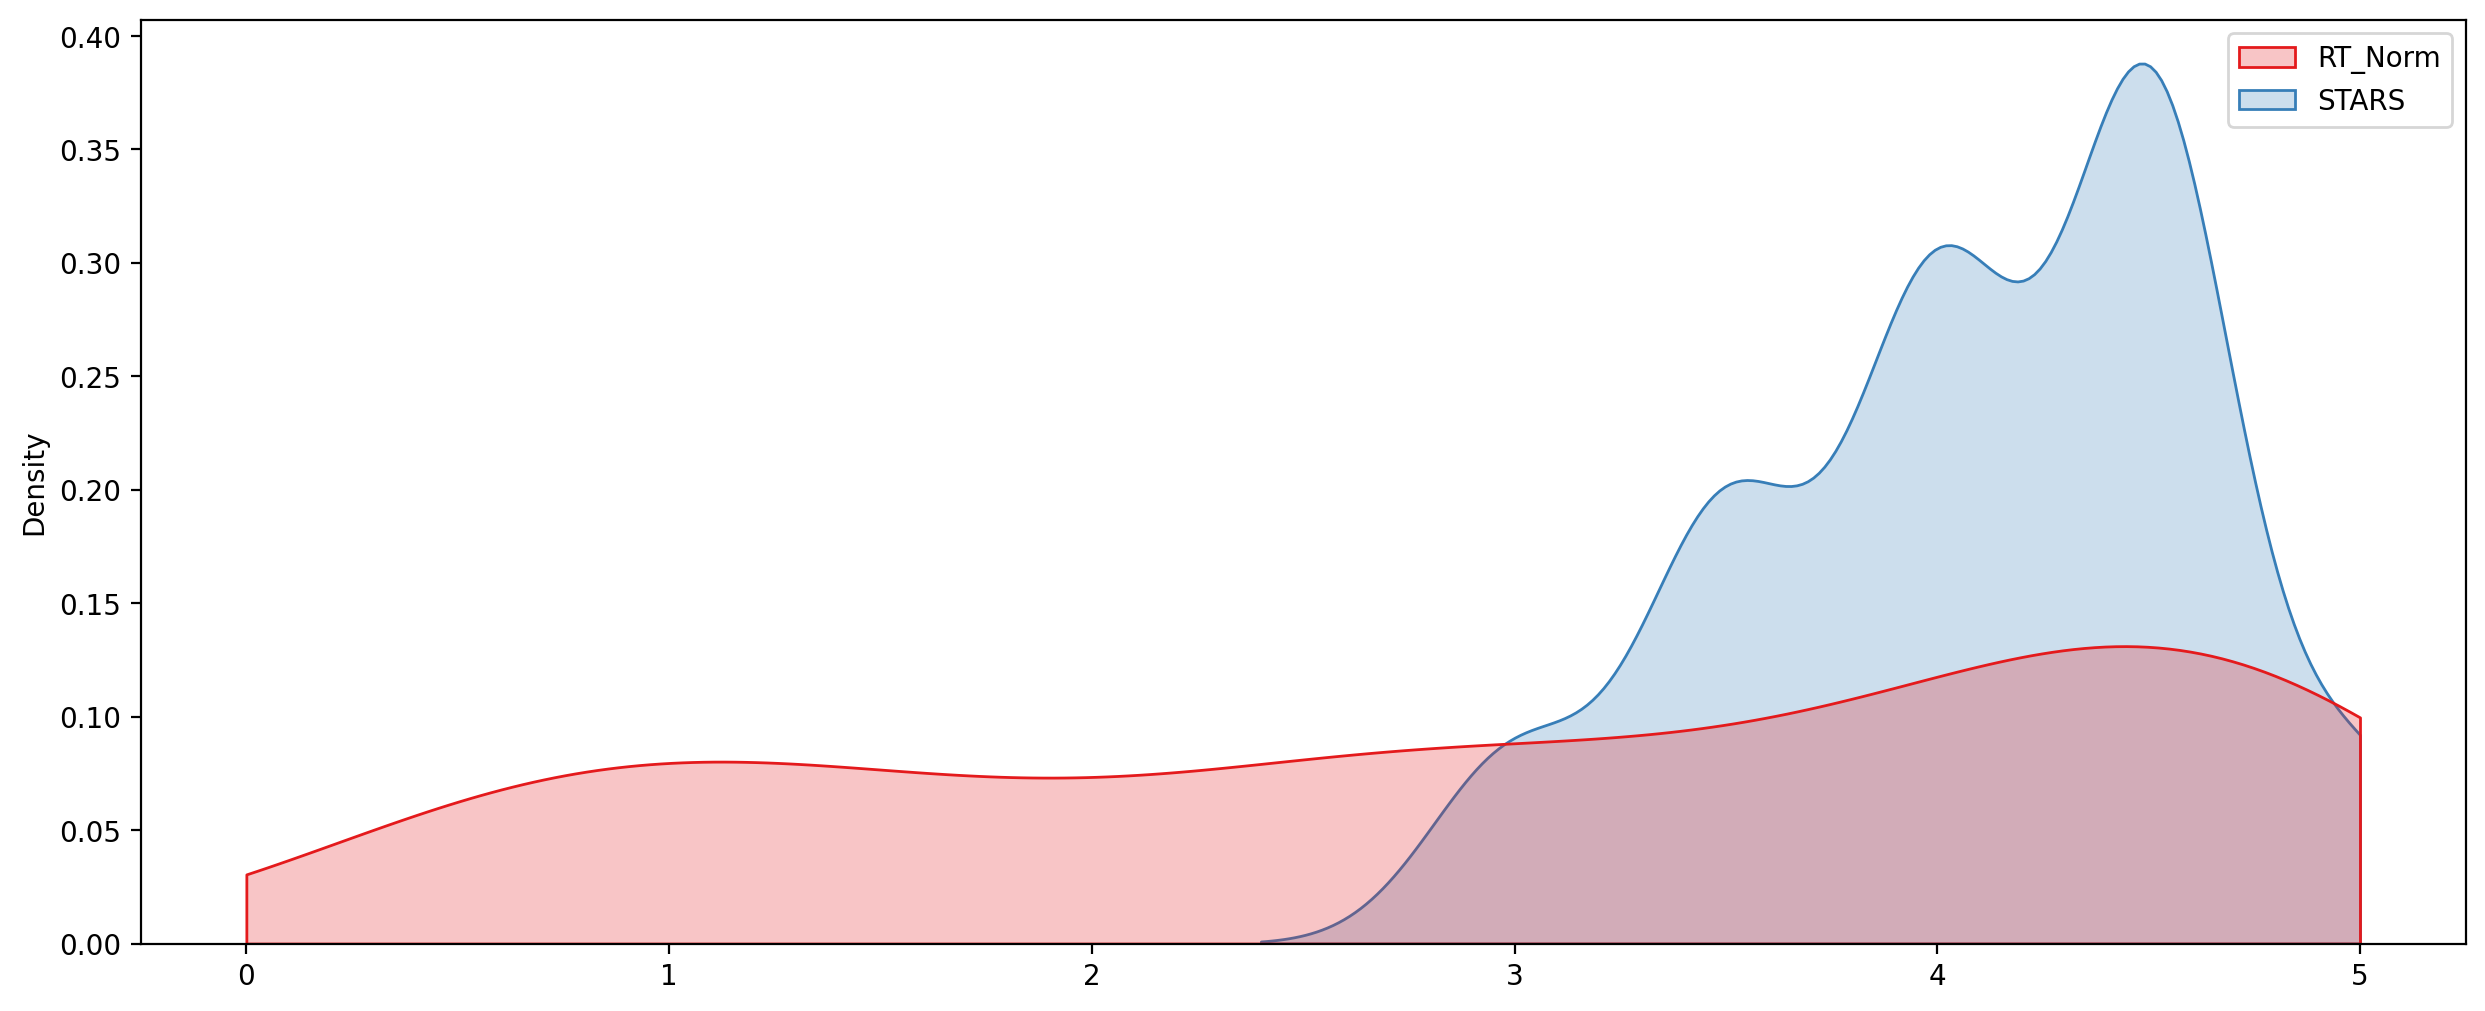

In [81]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1')

<Axes: ylabel='Count'>

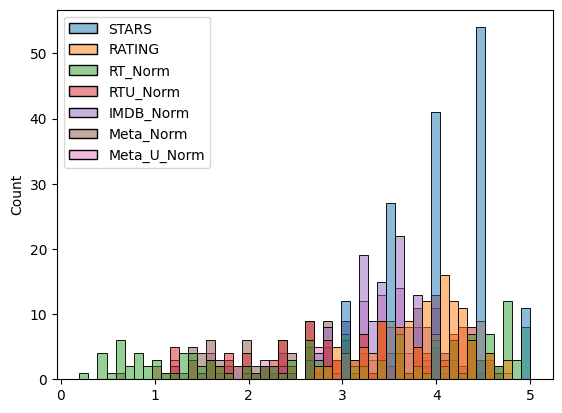

In [82]:
sns.histplot(norm_scores,bins=50)

Worst movies

In [85]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'IMDB_Norm', 'Meta_Norm',
       'Meta_U_Norm'],
      dtype='object')

In [91]:
norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'IMDB_Norm', 'Meta_Norm','Meta_U_Norm']]

In [95]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

<Axes: ylabel='Density'>

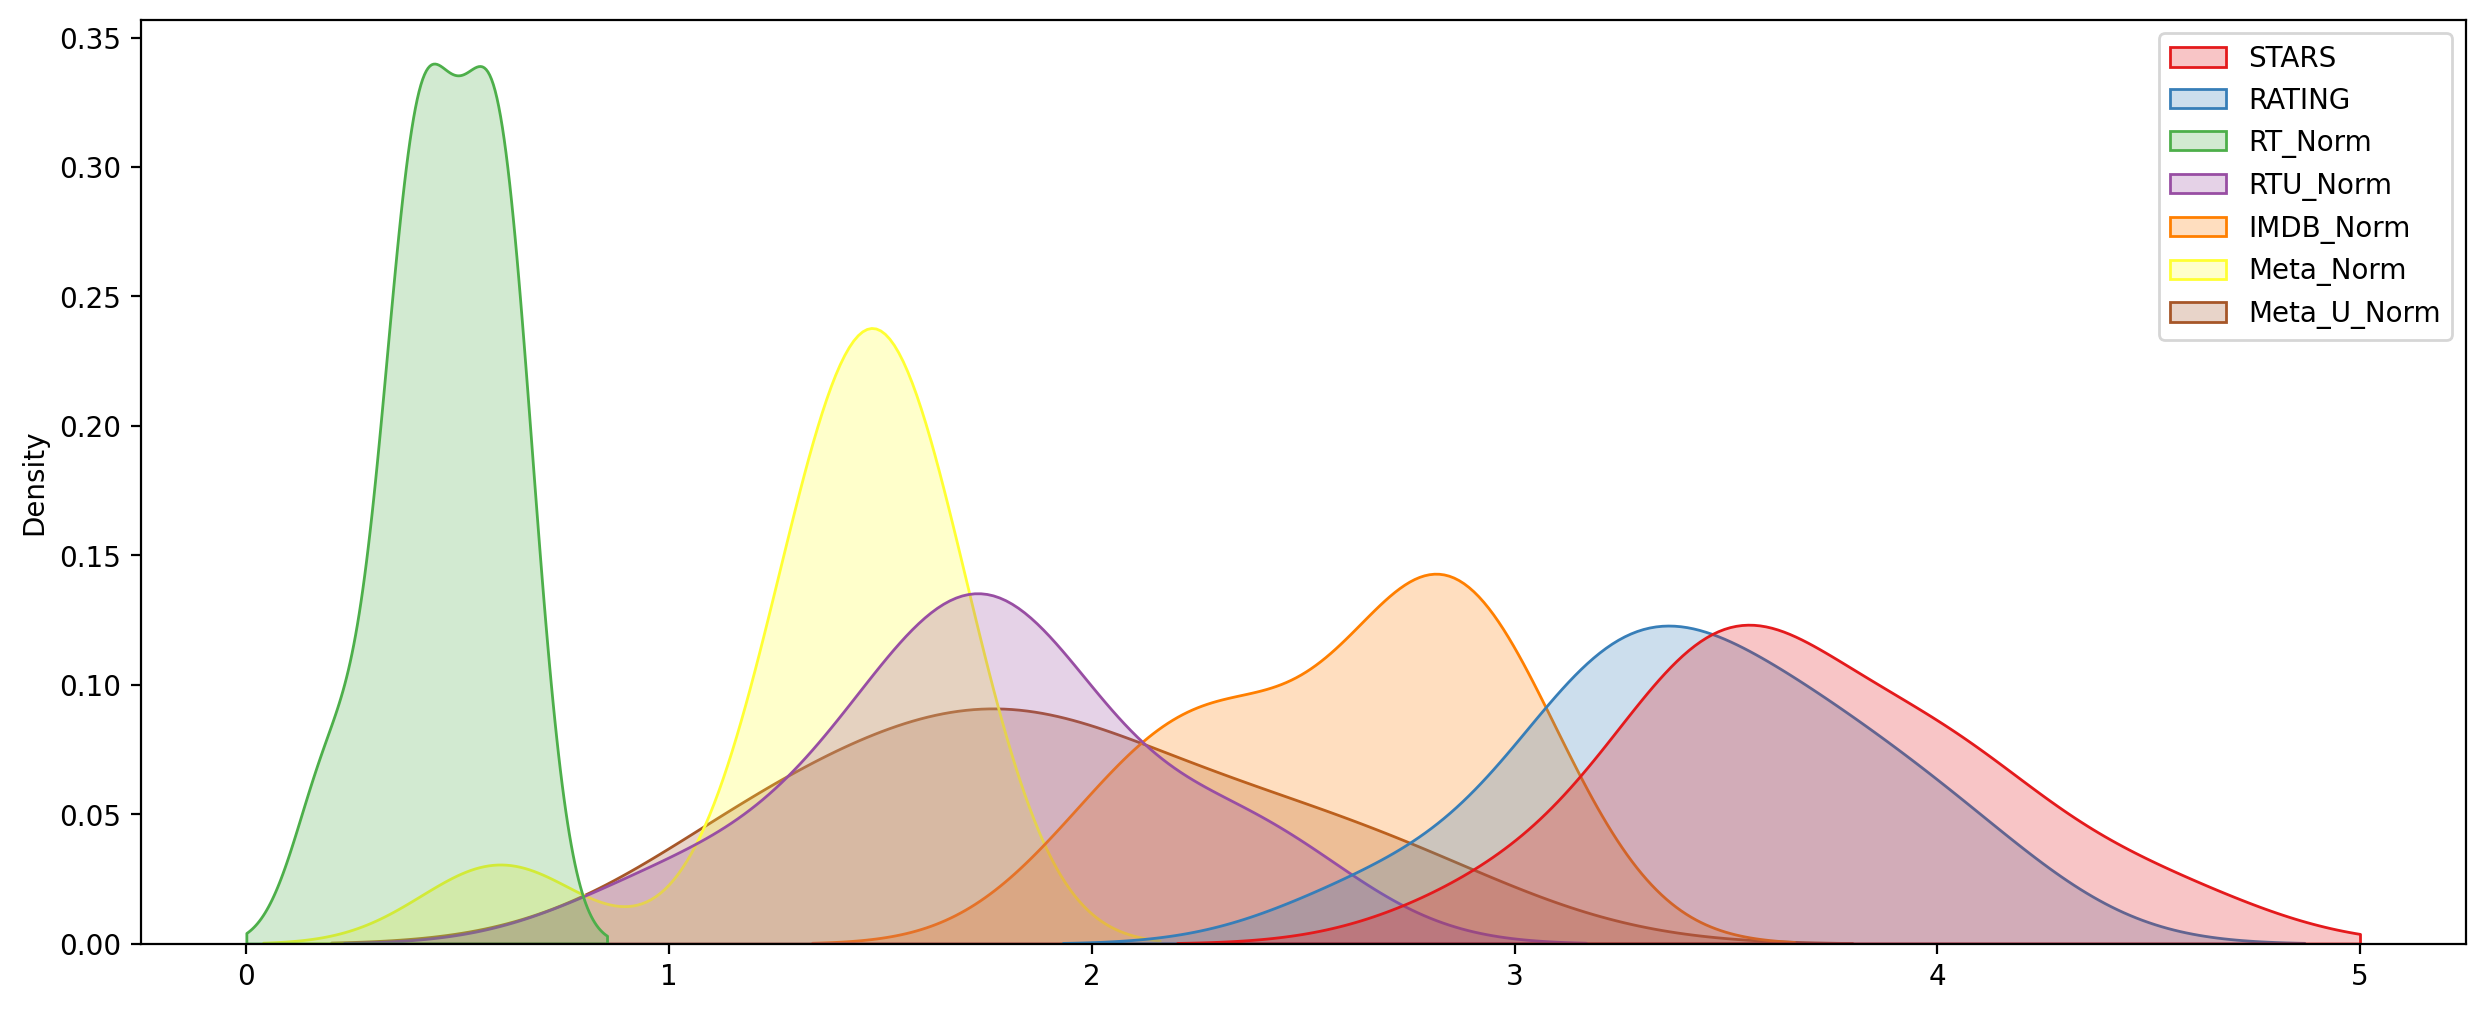

In [96]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')